In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np 
from visibility_graph import visibility_graph
import networkx as nx
import statsmodels.api as sm
import os

ruta = '../Blazar/'
title = 'Blazar'
edge = '../Blazar/edgeList/'

if not os.path.exists(ruta):
    os.makedirs(ruta)

    
if not os.path.exists(edge):
    os.makedirs(edge)

In [2]:
def lista0 (lista1, lista2):
    while 0 in lista1:
        lista2.pop(lista1.index(0))
        lista1.remove(0)
    return lista1, lista2 

def get_alpha(route,id, li_fit, ls_fit, xlimi, xlims, color, name):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf_{title}/'

    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    # Plot degree distribution
    a=np.linspace(li_fit,ls_fit,10)
    

    plt.figure(figsize=(6,4))
    print(np.corrcoef(a,(a)*(model.params[1])+model.params[0]*1.)[0, 1])
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color="k",lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)))
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); plt.legend(); plt.xlim(xlimi,xlims)
    plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    plt.savefig(routeSaved+f'{id}.pdf',dpi=400,bbox_inches='tight')
    plt.show()

    return

In [3]:
blazar = pd.read_csv(f'../transients/{title}.csv')
blazar

,Classification,ID,observation_id,Mag,Magerr,MJD
0,Blazar,1111171350514136075,202378,18.8134,0.141638,56097.183184
1,Blazar,1111171350514136075,202346,19.0674,0.174843,55976.275166
2,Blazar,1111171350514136075,202345,18.9387,0.164027,55976.266698
3,Blazar,1111171350514136075,202343,19.4288,0.204686,55959.286496
4,Blazar,1111171350514136075,202342,18.5432,0.137017,55959.280702
...,...,...,...,...,...,...
19821,Blazar,1302171230424139186,118845,19.9249,0.264278,56011.146120
19822,Blazar,1302171230424139186,118864,19.4358,0.211367,56214.454054
19823,Blazar,1302171230424139186,118836,19.3657,0.170740,55982.194337
19824,Blazar,1302171230424139186,118844,20.4842,0.357972,56011.141062


In [4]:
ids = list(blazar['ID'].unique())
print(len(list(blazar['ID'].unique())))
blazar['ID'].unique()


55


array([1111171350514136075, 1502081400484121702, 1110181290134107909,
       1501181320604119409, 1110171090534127312, 1610071320374137623,
       1112161230394126529, 1111221120534115711, 1412301120594110654,
       1112301380354137481,  904211350794109737,  905041430674135550,
       1109180041254129754, 1201261350534144397, 1201291120484130165,
       1109260040234128189, 1103051070734123798, 1105031400494106710,
        902140010554111683, 1202251210174133400, 1202191380504109013,
       1204111210464120236, 1401070011234112940, 1405191320754141571,
       1202291210684145534, 1103281260734125627, 1606161090634117514,
        811071351034109903, 1010111011204118970, 1205251090794110609,
       1210211070014111403,  805061180634116217, 1006040091104115912,
        811041150144132384, 1209171320804150109,  812221320064119991,
       1209171260074119171, 1303151210504145839,  912111210184153058,
       1302110040604104918,  810300040154130307, 1002151210634128202,
        912201400354

##### Función para hacer los datos

In [5]:
#funcion que haga eso de forma automatica

def edgelist(id):

    vec_id = blazar[blazar['ID'] == id]['Mag']
    graph_id = visibility_graph(vec_id)
    nx.write_edgelist(graph_id, f'{ruta}edgeList/{id}')

In [6]:
import random

# Define tu lista

# Obtén una muestra aleatoria de tamaño 5 sin repeticiones
muestra_aleatoria = random.sample(ids, 15)

# Imprime la muestra aleatoria
print("Muestra aleatoria sin repeticiones:", muestra_aleatoria)


Muestra aleatoria sin repeticiones: [1205251090794110609, 1002151210634128202, 1610071320374137623, 1103051070734123798, 1111221120534115711, 1606161090634117514, 1110181290134107909, 1209171320804150109, 812221320064119991, 1309281121184118018, 1201261350534144397, 1006040091104115912, 911261180414138295, 1105031400494106710, 811071351034109903]


In [6]:
def get_alpha_data(route,id, li_fit, ls_fit, name):
    
    data = f'{edge}{id}'
    
    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    alpha = -np.round(model.params[1],2)
    values = [name,id,alpha]
    
    return values

In [7]:
values = []
for id in ids:
    values.append(get_alpha_data(edge, id, 0.777, 1.413, 'Blazar')) 
print(values)

[['Blazar', 1111171350514136075, 2.59], ['Blazar', 1502081400484121702, 2.41], ['Blazar', 1110181290134107909, 2.14], ['Blazar', 1501181320604119409, 2.38], ['Blazar', 1110171090534127312, 2.49], ['Blazar', 1610071320374137623, 2.58], ['Blazar', 1112161230394126529, 2.36], ['Blazar', 1111221120534115711, 2.2], ['Blazar', 1412301120594110654, 2.19], ['Blazar', 1112301380354137481, 2.67], ['Blazar', 904211350794109737, 2.51], ['Blazar', 905041430674135550, 2.42], ['Blazar', 1109180041254129754, 2.27], ['Blazar', 1201261350534144397, 2.41], ['Blazar', 1201291120484130165, 2.58], ['Blazar', 1109260040234128189, 2.45], ['Blazar', 1103051070734123798, 2.37], ['Blazar', 1105031400494106710, 2.35], ['Blazar', 902140010554111683, 2.16], ['Blazar', 1202251210174133400, 2.43], ['Blazar', 1202191380504109013, 2.29], ['Blazar', 1204111210464120236, 2.34], ['Blazar', 1401070011234112940, 2.45], ['Blazar', 1405191320754141571, 2.32], ['Blazar', 1202291210684145534, 2.59], ['Blazar', 11032812607341256

In [8]:
import csv 

ruta = '../resultados/prueba.csv'

with open (ruta, mode = 'a', newline = '') as archivo: 
    writer = csv.writer(archivo)

    writer.writerows(values)
    pass

#### Indices de los id's a probar (sacado aleatoreamente)

id1 = 4
id2 = 42
id3 = 0
id4 = 35
id5 = 32


In [19]:
ids_group = [1105031400494106710, 1305091120664119543, 1303151210504145839, 1502081400484121702, 812221320064119991, 
             1111171350514136075, 811071351034109903, 1501181320604119409, 1205251090794110609, 1103281260734125627, 
             1302110040604104918, 1005121320394119966, 1204111210464120236, 1010111011204118970, 1202251210174133400]


""" id1 = 1110171090534127312
id2 = 912201400354121224
id3 = 1111171350514136075
id4 = 812221320064119991
id5 = 1006040091104115912


edgelist(id1)
edgelist(id2)
edgelist(id3)
edgelist(id4)
edgelist(id5) """

for _ in ids: 
    edgelist(_)

In [8]:
import numpy as np

# Define tus datos
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Calcula el coeficiente de correlación
coef_corr = np.corrcoef(x, y)[0, 1]

# Imprime el coeficiente de correlación
print("Coeficiente de correlación:", coef_corr)



Coeficiente de correlación: 0.9999999999999999


In [9]:
values_min = [0.73, 0.70, 0.72, 0.79, 0.70, 0.72, 0.78, 0.78, 0.87, 0.96, 0.76, 0.84, 0.71, 0.87, 0.73]
values_max = [1.43, 1.44, 1.48, 1.48, 1.39, 1.29, 1.34, 1.38, 1.34, 1.34, 1.43, 1.45, 1.59, 1.41, 1.41]
values_alpha = [2.21, 2.14, 2.4, 2.59, 2.39, 2.84, 2.77, 2.53, 3.09, 3.76, 2.26, 2.56, 2.01, 2.56, 2.43]

-1.0


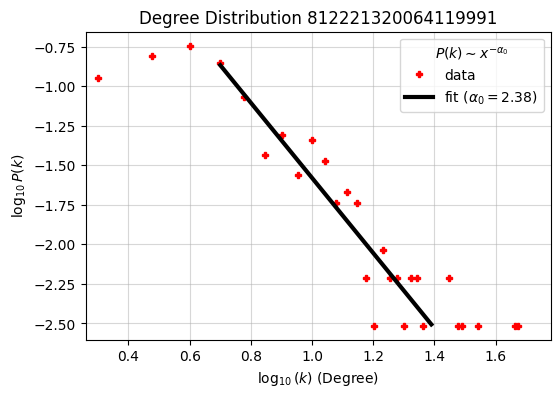

In [10]:
get_alpha(ruta, ids_group[4], 0.70, 1.39,0.26,1.78, "red", ids_group[4])

#### PRUEBA 1 $\rightarrow$ Blazar

ID: 1110171090534127312

In [11]:
#0.85 & 1.34 -> 3.0
#otra opcion: 0.65  & 1.43 -> 2.32 [posible ganadora]
#otra (no creo tanto): 0.72 & 1.42 -> 2.4

# get_alpha(ruta, id1, 0.73,1.5,0.26,1.78, "red", id1)


#### PRUEBA 2 $\rightarrow$ Blazar

ID: 912201400354121224

In [12]:
#0.85 & 1.34 -> 1.58
#otra opcion: 0.65  & 1.398 -> 2.19 [posible ganadora]
#otra: 0.695 & 1.398 -> 2.19 [mismo pero mejor]

# get_alpha(ruta,id2,0.72,1.41,0.3,1.75, "red", id2)

#### PRUEBA 3 $\rightarrow$ Blazar

ID: 1111171350514136075


In [13]:


# get_alpha(ruta,id3,0.715,1.29,0.3,1.75, "red", id3)

#### PRUEBA 4 $\rightarrow$ Blazar

ID: 812221320064119991

In [14]:

#dudo un poco 

# get_alpha(ruta,id4,0.70,1.395,0.3,1.75, "red", id4)

#### PRUEBA 5 $\rightarrow$ Blazar

ID: 1006040091104115912

In [15]:


# get_alpha(ruta,id5,0.79,1.46,0.3,1.75, "red", id5)